In [48]:
# %pip install dabl
# %pip install pandas
#%pip install ydata-profiling
#%pip install great_expectations
#%pip install faker matplotlib
#%pip install pygam
#%pip install scikit-learn
#%pip install decision-tree-id3
#%pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 675.6 kB/s eta 0:00:000:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process, as it facilitates a deeper understanding of the dataset's underlying structure and characteristics. One of the primary aspects of EDA is the examination of data distribution, which provides insights into the spread, central tendency, and shape of the data. These characteristics are essential for determining the appropriate statistical models and transformations. For instance, skewed data may require normalization or scaling to meet the assumptions of certain algorithms, while normally distributed data may allow for direct application of parametric models.

Another key function of EDA is handling missing data. Detecting missing values early is vital, as unaddressed gaps in data can lead to biased analyses and incorrect conclusions. EDA helps the analyst decide whether to remove incomplete data points, impute missing values using statistical methods, or opt for models that can inherently manage missing data. The choice of approach depends on the extent of missing data and its potential impact on the results.

EDA also plays a significant role in assessing feature relationships. By visualizing correlations and pairwise relationships, analysts can determine which features are most informative and which may be redundant due to high multicollinearity. Understanding these relationships not only helps in feature selection but also informs the interpretation of the data and the development of more robust predictive models.

In addition, EDA aids in the identification of outliers and anomalies within the data. Outliers can significantly skew results and model performance, making it essential to detect and handle them appropriately. EDA allows for the early identification of these extreme values, enabling analysts to decide whether to remove them, transform the data, or adjust the analysis to account for their presence.

Finally, EDA provides initial insights for generating hypotheses about the data. By uncovering patterns and relationships, EDA helps guide subsequent analysis steps, such as selecting features for modeling or testing specific hypotheses. This process not only leads to a more focused approach in data analysis but also enhances the interpretability and validity of the final models.

In summary, EDA is an indispensable phase in data analysis that informs decision-making regarding data preparation, model selection, and the formulation of hypotheses, ultimately leading to more accurate and meaningful results.

In [26]:

import pandas as pd
import dabl 
train_data = pd.read_csv('//Users/adriana-stefaniaciupeanu/Documents/Personal projects/Titanic/train.csv')

## Data Analysis Baseline Library (dabl)

Tools like dabl are designed to streamline the exploratory data analysis (EDA) process, making it more accessible and efficient, particularly for users who may be new to data science or are working with complex datasets. dabl is a Python library that automates many of the essential tasks in EDA, such as visualizing distributions, detecting missing values, and identifying relationships between features, thereby reducing the manual effort and time typically required for these steps.

One of the key advantages of using tools like dabl is their ability to quickly generate comprehensive reports and visualizations that summarize important aspects of the dataset. For example, dabl can automatically detect data types (e.g., categorical, numerical), which helps guide the selection of appropriate visualization methods. It can also generate pairwise plots and correlation matrices that highlight potential relationships between features. This allows users to gain insights from the data with minimal coding, focusing their time on interpreting the results rather than manually configuring plots and analysis steps.

In addition to speeding up the analysis, dabl supports robust data cleaning and preprocessing workflows. It can identify missing data and provide recommendations for handling it, such as imputation or removal of rows with missing values. Moreover, dabl offers functionality to detect outliers and suggest appropriate transformations (e.g., scaling or normalizing) that could improve the performance of machine learning models.

The automation provided by tools like dabl does not sacrifice flexibility. While the tool makes initial EDA more efficient, users can still customize analyses, tailoring them to the specific nuances of their datasets. This combination of automation and customization ensures that even with minimal input, the user can achieve high-quality insights while retaining control over more complex analysis steps.

By incorporating tools like dabl into the EDA process, analysts can focus on interpreting data and making informed decisions, rather than getting bogged down in the mechanics of exploratory analysis. This makes it particularly useful for beginners or those working on time-sensitive projects, while still offering the depth and flexibility needed for more advanced users.

The dabl.detect_types() function is a useful feature of the dabl library that automatically analyzes the columns of a DataFrame to determine the types of data they contain. This function helps classify columns into categories like continuous, categorical, or date-time, which can significantly streamline the data cleaning and preprocessing stages.

When you apply dabl.detect_types() to your train_data DataFrame, the function will return a summary that indicates the type of data in each column. This information is crucial in helping you decide the appropriate methods for visualization, transformation, or handling missing values. For example, numerical columns identified as continuous might require scaling, while categorical columns could be one-hot encoded for use in machine learning models.

In [27]:
# Detect the types of data in the train_data DataFrame
dabl.detect_types(train_data)

/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individual

,continuous,dirty_float,low_card_int_ordinal,low_card_int_categorical,categorical,date,free_string,useless
PassengerId,False,False,False,False,False,False,False,True
Survived,False,False,False,False,True,False,False,False
Pclass,False,False,False,False,True,False,False,False
Name,False,False,False,False,False,False,True,False
Sex,False,False,False,False,True,False,False,False
Age,True,False,False,False,False,False,False,False
SibSp,False,False,True,False,False,False,False,False
Parch,False,False,True,False,False,False,False,False
Ticket,False,False,False,False,False,False,True,False
Fare,True,False,False,False,False,False,False,False


The output from dabl.detect_types() provides a clear classification of each column in the train_data DataFrame, indicating the nature of the data and helping to inform the next steps in the exploratory data analysis (EDA) process. Here’s how to interpret and use this information:

* Continuous: Columns such as Age and Fare are classified as continuous, meaning they contain numerical data that can take any value within a range. These columns may require scaling or normalization if you are using machine learning algorithms that are sensitive to the range of data.

* Low Cardinality Integers: The columns SibSp and Parch are marked as low_card_int_ordinal, meaning they are integer-based features with a small number of distinct values. These columns could be treated as ordinal features in models or transformed depending on the context.

* Categorical: Columns like Survived, Pclass, Sex, and Embarked are identified as categorical. These features represent distinct categories and will need to be encoded (e.g., one-hot encoding or label encoding) before being used in machine learning models.
*Free String: Columns like Name, Ticket, and Cabin are classified as free_string, meaning they contain unstructured textual data. You may choose to extract relevant information from these columns (e.g., titles from Name or deck information from Cabin) or drop them if they don’t add predictive value.

* Useless: The PassengerId column is flagged as useless because it likely does not provide meaningful information for modeling—it’s just an identifier. We can safely drop this column from your analysis.

## Visualisation

Visualization is one of the most critical components of Exploratory Data Analysis (EDA). he dabl.plot() function is designed to automate the process of creating insightful visualizations during EDA. It explores the dataset, creates appropriate plots based on the data types, and highlights key relationships, such as how features interact with the target variable. In your case, you're analyzing the train_data with a target column of "Survived" to understand which features might influence survival.

This function call will generate several plots, including:

Univariate Analysis: Visualizations of individual features to understand their distribution and how they relate to survival (e.g., histograms or box plots for continuous variables like Age and Fare).

Bivariate Analysis: For categorical features such as Sex or Pclass, it might generate bar plots showing survival rates across different categories, helping identify patterns in the data.

Pairwise Relationships: It can also show scatter plots or correlation matrices to explore relationships between multiple features and how they jointly affect the target.
This automatic plotting by dabl.plot() allows you to quickly gain insights without manually coding individual plots, while still retaining the flexibility to customize and build on these visualizations later.

/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individual

Target looks like classification


/opt/homebrew/lib/python3.11/site-packages/dabl/plot/utils.py:614: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:
/opt/homebrew/lib/python3.11/site-packages/dabl/plot/utils.py:621: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(target)[column].value_counts().unstack(target)


Linear Discriminant Analysis training set score: 0.589


/opt/homebrew/lib/python3.11/site-packages/dabl/plot/utils.py:621: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(target)[column].value_counts().unstack(target)
/opt/homebrew/lib/python3.11/site-packages/dabl/plot/utils.py:614: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:
/opt/homebrew/lib/python3.11/site-packages/dabl/plot/utils.py:614: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Survived'>,
 [array([[<Axes: ylabel='Age'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: ylabel='SibSp'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: ylabel='Parch'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: xlabel='Age', ylabel='Fare'>, <Axes: xlabel='SibSp'>,
          <Axes: xlabel='Parch'>, <Axes: xlabel='Fare'>]], dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 array([[<Axes: title={'center': 'Sex'}>,
         <Axes: title={'center': 'Pclass'}>,
         <Axes: title={'center': 'Embarked'}>]], dtype=object)]

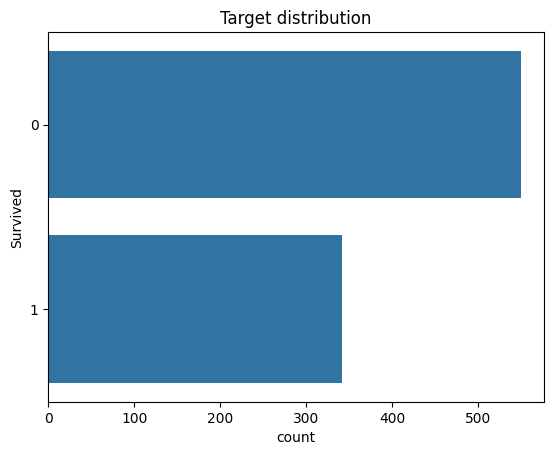

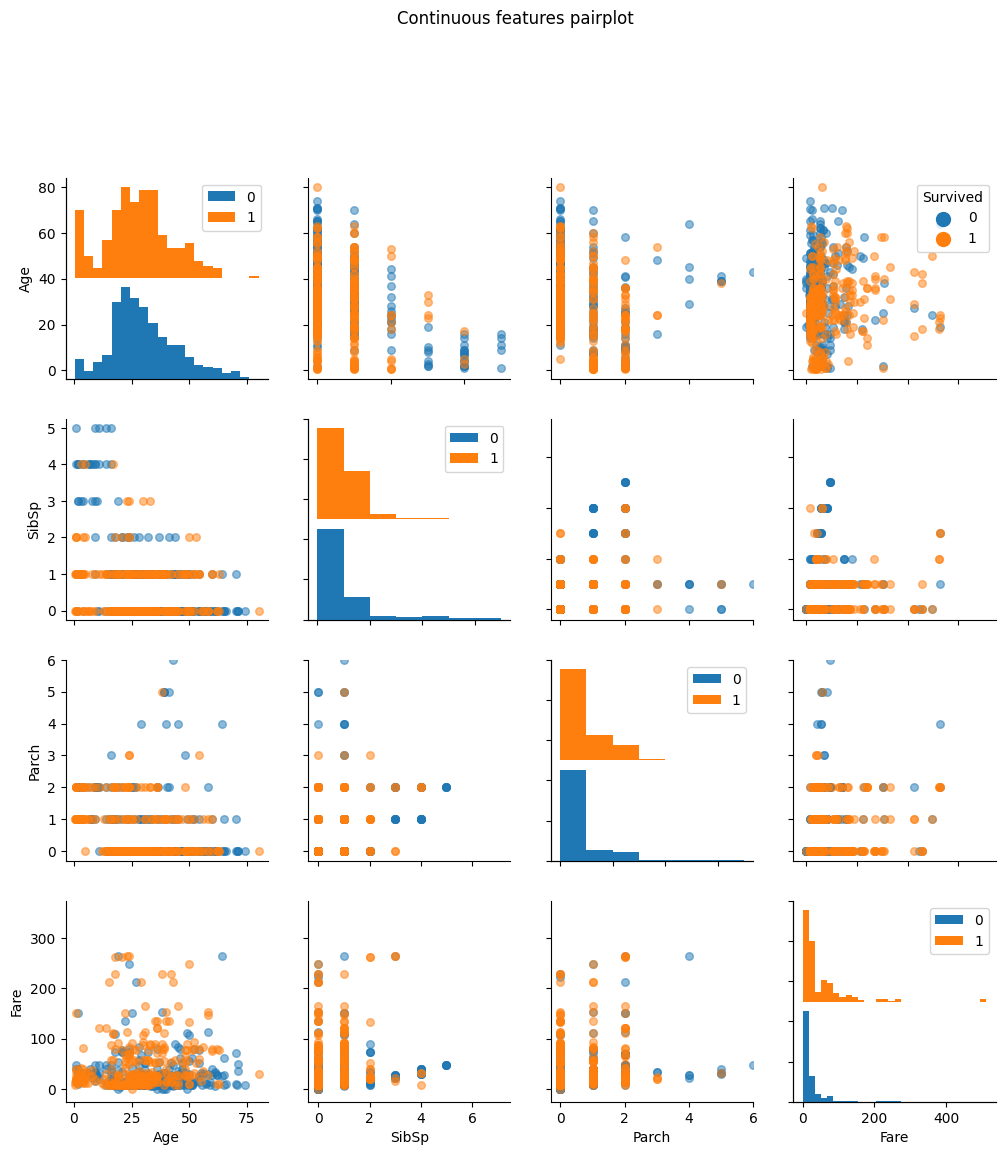

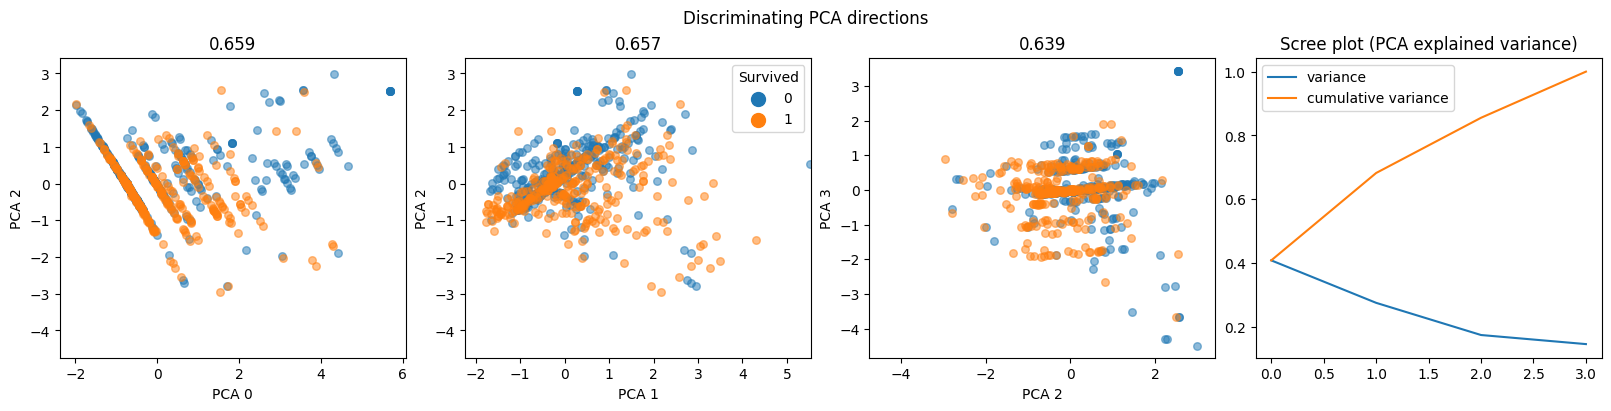

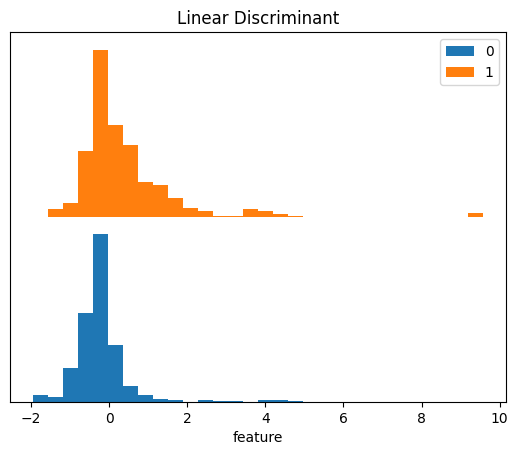

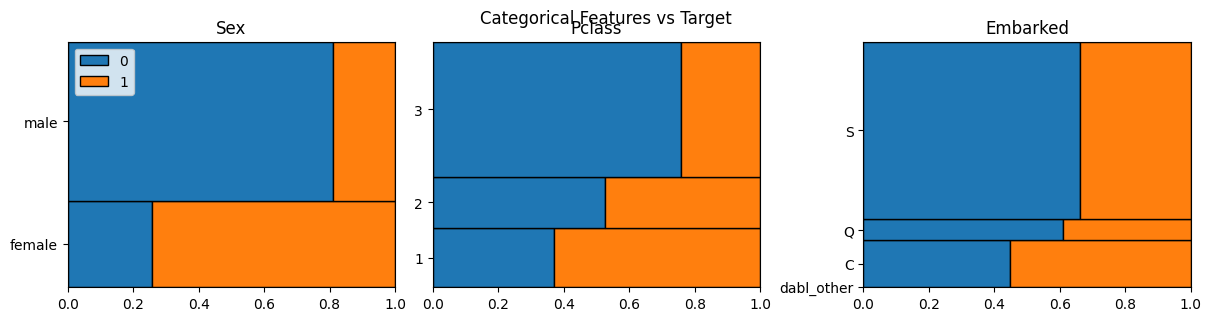

In [28]:
# Create exploratory visualizations for the dataset with "Survived" as the target column
dabl.plot(train_data, target_col="Survived")

Target Distribution:
The first plot visualizes the distribution of the target variable, Survived, and provides crucial information about whether the dataset is balanced. In this case, the survival data is relatively balanced, with approximately 60% non-survivors and 40% survivors. This balance suggests that common metrics like accuracy_score are appropriate for evaluating model performance. However, in cases of imbalanced datasets, where one class significantly outweighs the other, more advanced techniques such as oversampling, undersampling, or using evaluation metrics like F1-score or AUC would be necessary to avoid misleading results.

Continuous Features Plot:
The next visualization is a matrix of plots for the continuous features (Age, SibSp, Parch, and Fare). The diagonal shows univariate distribution plots for each feature, while the off-diagonal displays scatter plots for feature pairs. Notably, the Age distribution shows that a larger proportion of younger passengers survived compared to older ones, making this an important variable for modeling survival. Similarly, the SibSp plot suggests that passengers traveling with a sibling or spouse had a higher chance of survival. On the other hand, Parch and Fare show little distinction between survival outcomes. The scatter plots also help to identify potential outliers, such as one family paying a much higher fare, which might warrant further investigation.

Principal Component Analysis (PCA):
This section features scatter plots comparing the PCA directions, along with a scree plot that shows the explained variance by each principal component. The first component accounts for about 40% of the variance, which could suggest the possibility of dimensionality reduction. However, with the limited number of features in this dataset, PCA may not be highly beneficial. Instead, feature selection based on their importance in predicting survival is a more practical approach. While PCA can be valuable in more complex datasets, applying it here may not significantly improve model performance.

Linear Discriminant Analysis (LDA):
LDA aims to find a linear combination of features that best separates the classes (Survived = 0 and Survived = 1). The histogram shows the regression coefficients (weights) along the x-axis, with the goal of assessing how separable the two classes are. In this case, the overlap between the two classes suggests that LDA is not particularly effective in distinguishing between survivors and non-survivors. Therefore, other techniques, such as decision trees or logistic regression, may be more suitable for this dataset.

Categorical Features:
The final set of plots consists of mosaic plots for the categorical features (Sex, Pclass, and Embarked). These plots reveal some of the strongest relationships in the data. For example, a clear majority of females survived compared to males, and survival rates also varied significantly by passenger class, with those in first class having the highest survival rate. These insights suggest that incorporating Sex and Pclass into your model is likely to improve its predictive accuracy, as these variables show strong associations with the target outcome.

## Pearson correlation matrix

The Pearson correlation matrix provides a useful summary of the linear relationships between continuous variables in the dataset. By using the train_data.corr() function, we can produce this matrix and visualize it using a color gradient for easier interpretation.

In [29]:
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=[float, int])

# Now compute the correlation matrix and apply the background gradient
numeric_data.corr().style.background_gradient(cmap='Blues')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Interpreting the Pearson Correlation Matrix:

The Pearson correlation coefficient measures the strength of the linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A correlation close to 0 indicates no linear relationship.

Highly Correlated Features: If two features are highly correlated (whether positively or negatively), they provide similar information, and one can often be dropped to avoid redundancy and multicollinearity issues in certain models. For instance, if two variables have a correlation above 0.8 or below -0.8, we might consider keeping only one of them.

Key Observations:
* Pclass and Fare: These two variables show a strong negative correlation, which makes sense because higher-class tickets (e.g., first-class) were more expensive than lower-class tickets.

* SibSp and Parch: These features are moderately correlated, suggesting that families often traveled together, as SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard) tend to increase together, indicating family units.
* Pclass and Age: There’s also a negative correlation between Pclass and Age, implying that younger passengers were more likely to be in lower classes, such as third-class.
Survived and Pclass: The most important correlation for this analysis is between Survived and Pclass (-0.34), indicating that passengers in lower classes had a significantly lower survival rate, which aligns with historical accounts of the Titanic disaster, where those in first class had the best chances of survival.

Using the Correlation Matrix in Practice:
Understanding these correlations can help guide feature selection and transformation. For example, given the negative correlation between Pclass and Fare, you might choose to drop one of these features (if needed) to reduce multicollinearity. However, in this dataset, both Pclass and Fare likely provide important independent insights, so it might be better to retain both in most models.

The matrix also helps identify patterns that can inform hypothesis testing, for example, examining why Pclass is strongly associated with survival or investigating the effects of family size on survival by looking into the relationship between SibSp, Parch, and Survived.

## Data profiling 

When working with data, ensuring quality is essential for building reliable models and deriving accurate insights. In Python, several tools have emerged to help with data validation and quality checks, each offering unique features for handling various data integrity challenges. Let’s explore some of the most effective libraries for testing data quality.

### Pandas Profiling
Pandas Profiling is a widely used tool for generating comprehensive reports that summarize data quality and offer insights into issues such as missing values, inconsistent data types, and outliers. This library provides a one-stop solution for an initial exploratory data analysis, automating the process of detecting common data problems.

What it checks:

* Missing values and patterns
* Data type consistency
* Univariate and multivariate distributions
* Correlations and outliers




In [30]:
import ydata_profiling

profile = train_data.profile_report(title="Pandas Profiling Report")
profile.to_file("data_quality_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/homebrew/lib/python3.11/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x16152de00, file "/opt/homebrew/lib/python3.11/site-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data anonymization using Faker

Data anonymization is crucial in the age of data sharing and compliance with privacy laws such as GDPR. For this tutorial, we'll explore how to anonymize sensitive information using Python’s Faker library. Specifically, we’ll work with the Titanic dataset and anonymize the Name, Ticket, and Cabin columns while maintaining the integrity of the data structure.

The goal is to preserve the usefulness of the data for analysis without revealing personally identifiable information (PII).

We will use the following libraries:

* pandas: For handling and manipulating the dataset.
* faker: To generate fake, but plausible, data.
* matplotlib (optional): For visualizing any before/after results.


In this dataset, the following columns contain sensitive information:

* Name: Passenger names.
* Ticket: Ticket numbers.
* Cabin: Cabin numbers.

We will anonymize these columns using Faker.

he Name column contains identifiable information that needs to be anonymized. Using Faker, we can replace these names with random names while preserving the structure (i.e., titles like Mr., Mrs., etc.).


In [31]:
from faker import Faker
import random

# Initialize Faker
fake = Faker()

def anonymize_name(name):
    try:
        # Attempt to split into title, last name, first name
        title_last, first_name = name.split(', ')
        fake_name = fake.name().split(' ')
        return f"{title_last}, {fake_name[1]} {fake_name[0]}"
    except ValueError:
        # Fallback for names that don't match the expected pattern
        return fake.name()

# Apply the updated anonymization function
train_data['Name'] = train_data['Name'].apply(anonymize_name)

# Preview the updated names
train_data[['Name']].head()


,Name
0,"Braund, Donovan Nicholas"
1,"Cumings, Pollard Timothy"
2,"Heikkinen, Phillips Barbara"
3,"Futrelle, Wade Samantha"
4,"Allen, Grant Tracey"


Ticket numbers might not be as sensitive as names, but anonymizing them adds an extra layer of security. We will replace the ticket numbers with random alphanumeric strings.

In [32]:
def anonymize_ticket(ticket):
    return fake.bothify(text='???###??###')

# Apply anonymization
train_data['Ticket'] = train_data['Ticket'].apply(anonymize_ticket)

# Preview the updated tickets
train_data[['Ticket']].head()


,Ticket
0,uQc882hE582
1,XOc815cH906
2,des607jE229
3,aJz000fB301
4,Qsh331Vc916


Cabin numbers can also potentially reveal private information. We will generate new fake cabin numbers.

In [33]:
def anonymize_cabin(cabin):
    if pd.isna(cabin):
        return cabin
    return fake.bothify(text='???###')

# Apply anonymization
train_data['Cabin'] = train_data['Cabin'].apply(anonymize_cabin)

# Preview the updated cabin numbers
train_data[['Cabin']].head()


,Cabin
0,NaN
1,Lbu517
2,NaN
3,Hzd083
4,NaN


For illustrative purposes, we can visualize the changes in a side-by-side comparison.

In [34]:
# Compare original vs anonymized dataset for Name, Ticket, and Cabin columns
original_data = pd.read_csv('//Users/adriana-stefaniaciupeanu/Documents/Personal projects/Titanic/train.csv')

comparison = pd.DataFrame({
    'Original Name': original_data['Name'],
    'Anonymized Name': train_data['Name'],
    'Original Ticket': original_data['Ticket'],
    'Anonymized Ticket': train_data['Ticket'],
    'Original Cabin': original_data['Cabin'],
    'Anonymized Cabin': train_data['Cabin'],
})

# Display a sample of the comparison
comparison.sample(5)


,Original Name,Anonymized Name,Original Ticket,Anonymized Ticket,Original Cabin,Anonymized Cabin
682,"Olsvigen, Mr. Thor Anderson","Olsvigen, Wagner Nathan",6563,yeZ857LT003,NaN,NaN
670,"Brown, Mrs. Thomas William Solomon (Elizabeth ...","Brown, Patton Stephanie",29750,Puh461Le837,NaN,NaN
321,"Danoff, Mr. Yoto","Danoff, Kelly Carrie",349219,ptC467ze600,NaN,NaN
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)","Warren, Walker Theresa",110813,FQC095nn528,D37,bIT188
326,"Nysveen, Mr. Johan Hansen","Nysveen, Boyd Emily",345364,fEI871zF088,NaN,NaN


Now that we have successfully anonymized the dataset, we can save it to a new CSV file.

In [35]:
train_data.to_csv('anonymized_titanic_data.csv', index=False)


# Generalized Additive Models

Generalized Additive Models (GAMs) are a type of statistical model that allow us to model complex relationships between variables while keeping interpretability. Unlike traditional models that assume a straight-line relationship, GAMs let us model each variable's effect in a flexible, smooth manner.

Generalized Additive Models (GAMs) are particularly useful when linear models are too restrictive and more complex machine learning models, like neural networks or decision trees, are too opaque or hard to interpret.

When Linear Models Are Too Restrictive:
Linear models assume a straight-line relationship between predictors (independent variables) and the outcome (dependent variable). This is often too simple for real-world data. For example, if you’re modeling the relationship between age and survival probability, the effect of age on survival might not increase or decrease in a straight line; it might have a more nuanced curve. Linear models can’t capture this kind of complexity.

GAMs solve this by allowing the relationship between each predictor and the outcome to be more flexible and smooth, rather than assuming it’s strictly linear. This flexibility is key in capturing more complex patterns while still remaining interpretable.

When Machine Learning Models Are Too Opaque:
Machine learning models, like neural networks or random forests, are often called "black boxes" because they make very accurate predictions but it’s hard to understand how the input variables contribute to the predictions. For instance, you might know a neural network predicts who survives the Titanic disaster, but you can’t easily see which factors are important and how they influence the result.

GAMs, on the other hand, are more transparent. They still offer flexibility, but you can clearly see how each individual predictor affects the outcome, which makes them more interpretable than many machine learning models. This is especially important in fields like healthcare or finance, where understanding how decisions are made is crucial.

Thus, GAMs strike a balance: they are flexible enough to capture complex patterns in the data, but still interpretable enough to show how individual variables influence the outcome.

In [36]:
import pandas  as pd
import matplotlib.pyplot as plt
from pygam import LogisticGAM, s, f
# read in the trainig data
train_data = pd.read_csv('//Users/adriana-stefaniaciupeanu/Documents/Personal projects/Titanic/train.csv')
# read in the test data
test_data = pd.read_csv('//Users/adriana-stefaniaciupeanu/Documents/Personal projects/Titanic/test.csv')



We select a few key features from the dataset that could be predictive of survival, such as the passenger class (Pclass), gender (Sex), and family-related information (SibSp and Parch).

In [37]:
#selecting the features of interest
features = ["Pclass", "Sex", "SibSp", "Parch"]

Since machine learning models require numerical input, we convert the categorical features (like Sex) into dummy variables.

In [38]:
# Convert categorical variables to dummy variables
X_train = pd.get_dummies(train_data[features])
y_train = train_data["Survived"]
final_X_test = pd.get_dummies(test_data[features])

We now build a Logistic Generalized Additive Model (LogisticGAM) using pyGAM. Each feature gets its own spline function (s()), which allows the model to flexibly fit the data.

In [39]:
# Build the LogisticGAM classifier with splines for each feature
classifier = LogisticGAM(s(0) + s(1) + s(2) + s(3))

# Fit the model
classifier.fit(X_train, y_train)


LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

Using the trained model, we predict survival for the test data.

In [40]:
# Predict survival for the test dataset
predictions = classifier.predict(final_X_test)

# Convert predictions from boolean (True/False) to binary (1/0)
predictions = (predictions)*1


To understand how the model performed and to view the coefficients for each feature, we generate a summary of the model.

In [41]:
# Produce a summary of the model
classifier.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      13.174
Link Function:                        LogitLink Log Likelihood:                                  -396.7965
Number of Samples:                          891 AIC:                                               819.941
                                                AICc:                                             820.4322
                                                UBRE:                                               2.9321
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3312
Feature Function                  Lam

/var/folders/h2/gh8m1cxd1tld8bq3yqqg35t80000gn/T/ipykernel_94529/2478397754.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  classifier.summary()


Interpreting classifier.summary()
After calling classifier.summary(), the output provides information about the GAM model’s terms and their significance in predicting the outcome. Here's how to interpret the key components:

* Degrees of Freedom (DoF): This tells you the model complexity for each spline term. A higher DoF means more flexibility for that feature to capture nonlinear relationships.
GCV (Generalized Cross-Validation): A lower GCV value indicates a better fit of the model to the data. It balances model complexity and accuracy.
* p-values: These are used to assess the significance of each term. A small p-value (<0.05)  means that the corresponding feature significantly contributes to the prediction.
* Deviance Explained: This is the proportion of the total variance explained by the model, similar to the R² in linear regression. A higher percentage means the model captures more of the variation in the data.

The summary provides important information about the performance and characteristics of the logistic Generalized Additive Model (GAM) fitted to the Titanic dataset.

Key Metrics:

* Distribution: The response variable follows a Binomial Distribution because the outcome (Survived or Not Survived) is binary.
* Link Function: The LogitLink indicates that we are using logistic regression, which models the probability of survival as a logit function.
* Effective Degrees of Freedom (DoF): The total model complexity, which includes the smoothness of the splines, is 13.174. This suggests a moderate level of flexibility in the model.
* Log Likelihood: This is a measure of the model’s fit to the data. Higher values indicate better fit, but this metric is often difficult to interpret directly.
* AIC (Akaike Information Criterion): The AIC penalizes for model complexity. Lower AIC values indicate a better model fit. Here, the AIC is 819.941, which is typical for logistic regression models of this size.
* Pseudo R-Squared: This value, 0.3312, indicates that about 33% of the variation in the outcome is explained by the model. This is relatively low but still suggests the model has some explanatory power.


Each feature is modeled using a spline function, allowing for non-linear relationships with the outcome. Here's how to interpret each row:

* s(0) corresponds to Pclass. The effective degrees of freedom (EDoF) is 3.6, which indicates a moderately flexible spline. The p-value (1.35e-13) is very small, indicating that the effect of this feature on survival is significant.
* s(1) corresponds to Sex. The EDoF is 4.4, and the p-value is also very small (2.67e-07), meaning Sex is a significant predictor of survival.
* s(2) corresponds to SibSp. The EDoF is 4.6, and the p-value is 0.0589, suggesting that the number of siblings/spouses onboard is somewhat significant but less important than Pclass and Sex.
* s(3) corresponds to Parch. With an EDoF of 0.6 and a p-value of 0.00, this feature has less flexibility but is still highly significant.

Here we visualize the partial dependence of each feature. This helps us understand the relationship between the predictors and the target variable (survival).

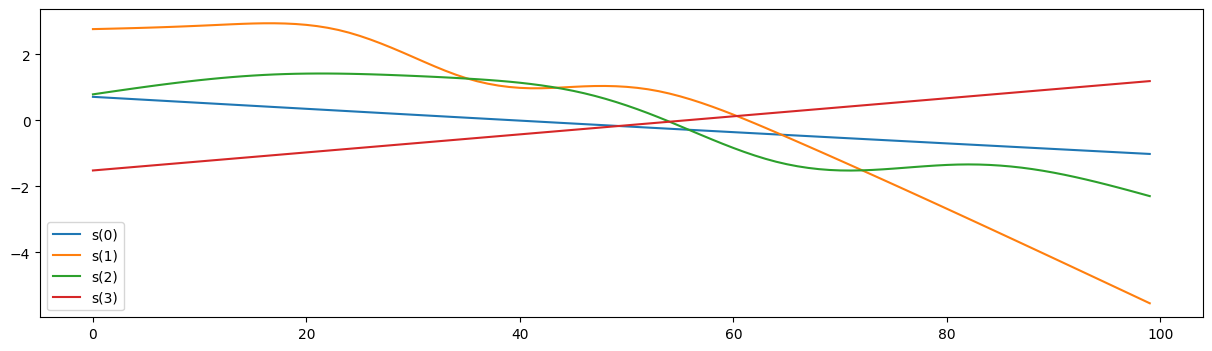

In [42]:
# Visualize the spline functions for each feature
plt.figure(figsize=(15, 4))
for i, term in enumerate(classifier.terms):
    if term.isintercept:
        continue
    plt.plot(classifier.partial_dependence(term=i), label="s({})".format(i))
    plt.legend()
plt.show()


Finally, we create a CSV file for submission. The file contains the PassengerId and the corresponding predictions for Survived.

In [43]:
# Create the submission file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)


The ROC curve helps visualize the performance of the classifier across different thresholds. You can calculate the ROC curve and AUC score to understand how well your model distinguishes between the two classes (Survived and Not Survived).

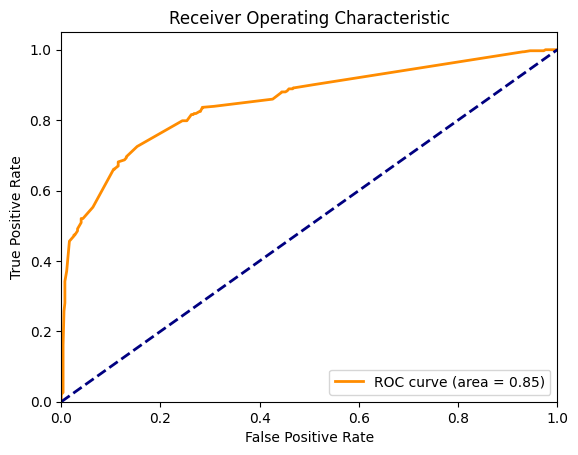

In [44]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities instead of labels
y_prob = classifier.predict_proba(X_train)

# Compute ROC curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Explanation of ROC Curve:
* True Positive Rate (TPR): This measures how many actual positives (Survived) are correctly classified.
* False Positive Rate (FPR): This measures how many actual negatives (Not Survived) are incorrectly classified.
* Area Under the Curve (AUC): This provides a single metric that summarizes the model’s performance across all thresholds. AUC ranges from 0.5 (random guessing) to 1.0 (perfect classifier).

# Iterative Dichotomiser 3 (ID3)

Iterative Dichotomiser 3 (ID3) is a decision tree algorithm used to create classification trees. It works by selecting the feature that provides the most information about the target class at each decision node, using a concept called "information gain." The main idea behind ID3 is to divide the data into subsets based on the most informative feature and repeat this process for each subset, creating a tree structure. Here's how it works step-by-step:
* Calculate Entropy: Entropy measures the uncertainty in a dataset. If all the instances belong to one class, the entropy is 0, and if the data is split evenly between classes, the entropy is 1.
* Calculate Information Gain: Information gain is the reduction in entropy after splitting the dataset based on a feature. ID3 selects the feature with the highest information gain for each split.
* Build the Decision Tree: ID3 recursively splits the data based on the feature with the highest information gain, forming a tree where each node represents a feature, and branches represent possible feature values.
* Stopping Criteria: The algorithm stops when either all the data points at a node belong to the same class, or there are no more features to split on.

Validation Accuracy: 78.21%
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       105
           1       0.79      0.65      0.71        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



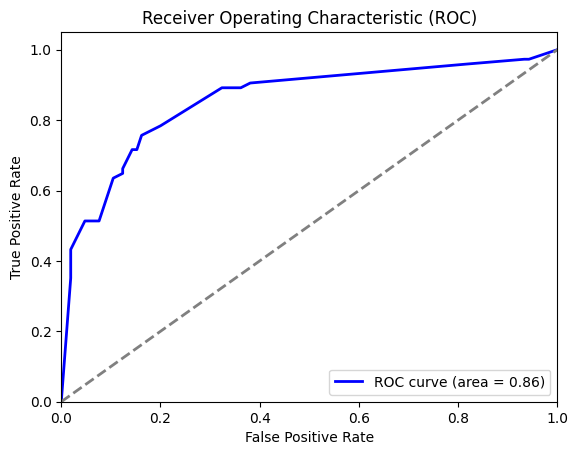

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Select the same features of interest
features = ["Pclass", "Sex", "SibSp", "Parch"]
# Convert categorical variables into dummy/indicator variables
X_train = pd.get_dummies(train_data[features])
y_train = train_data["Survived"]
final_X_test = pd.get_dummies(test_data[features])

# Optional: Split the training data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier (ID3-like behavior using 'entropy')
id3_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the training split
id3_classifier.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
val_predictions = id3_classifier.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, val_predictions)

# Display validation accuracy and classification report
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(classification_report(y_val_split, val_predictions))

# Optional: Visualize the ROC curve
fpr, tpr, _ = roc_curve(y_val_split, id3_classifier.predict_proba(X_val_split)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the final test data
test_predictions = id3_classifier.predict(final_X_test)

# Generate the submission file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_predictions})
output.to_csv('id3_submission.csv', index=False)


#### Model Evaluation Summary

**Validation Accuracy: 78.21%**

The validation accuracy represents the proportion of correctly predicted instances out of the total number of instances in the validation set. Here, the model correctly classified approximately 78.21% of the samples. This is a good indication of the model's overall performance, but it is essential to delve deeper into other metrics to understand its behavior in more detail.

#### Classification Report

The classification report provides additional insights into the model's performance by summarizing precision, recall, and F1-score for each class:

- **Class 0 (Not Survived):**
  - **Precision:** 0.78
    - Precision measures the proportion of true positives among all predicted positives. For Class 0, the model correctly predicted 78% of the instances that were actually Class 0.
  - **Recall:** 0.88
    - Recall indicates the proportion of true positives among all actual positives. The model was able to identify 88% of the instances that were actually Class 0.
  - **F1-Score:** 0.83
    - The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both aspects. For Class 0, the F1-score of 0.83 reflects a good balance between precision and recall.

- **Class 1 (Survived):**
  - **Precision:** 0.79
    - For Class 1, the model correctly predicted 79% of the instances that were actually Class 1.
  - **Recall:** 0.65
    - The model identified 65% of the actual Class 1 instances. This suggests that the model missed some instances of Class 1.
  - **F1-Score:** 0.71
    - The F1-score of 0.71 for Class 1 indicates a trade-off between precision and recall, with slightly lower performance compared to Class 0.

- **Overall Accuracy:** 0.78
  - The accuracy of 0.78 indicates that the model is reasonably effective overall, but there is room for improvement, particularly in identifying Class 1 instances.

- **Macro Average:**
  - **Precision:** 0.78
  - **Recall:** 0.76
  - **F1-Score:** 0.77
  - The macro average takes the average of the precision, recall, and F1-scores across all classes, treating each class equally. This provides a summary of performance without considering the imbalance in class distributions.

- **Weighted Average:**
  - **Precision:** 0.78
  - **Recall:** 0.78
  - **F1-Score:** 0.78
  - The weighted average accounts for the number of instances in each class, providing a summary that reflects the performance based on class distribution. It ensures that the performance of each class is proportionally represented.


The model performs well overall with a validation accuracy of 78.21%. However, it has slightly lower recall for Class 1 (Survived), indicating that it misses some instances of individuals who survived. Improving the model's recall for Class 1 might involve adjusting model parameters, feature engineering, or using more advanced algorithms.

The F1-scores for both classes are reasonably high, suggesting a good balance between precision and recall. The macro and weighted averages provide additional context on how the model performs across classes and take into account the class distribution in the validation set.

Overall, while the model shows strong performance, further analysis and improvements might be necessary to address any class-specific issues and enhance the ability to 


# Decision Trees

Decision trees are a widely used machine learning algorithm for both classification and regression tasks. They work by recursively splitting the data into subsets based on the value of input features. Each internal node of the tree represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an outcome.


### Simple example using Sex and passager class

In [46]:
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz

# Features and target
features = ["Sex", "Pclass"]
X_train = pd.get_dummies(train_data[features])
y_train = train_data["Survived"]
X_test = pd.get_dummies(test_data[features])

# Train the Decision Tree classifier
classifier = tree.DecisionTreeClassifier(criterion='gini',
                                         splitter='best',
                                         max_depth=2,
                                         random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Visualising the tree

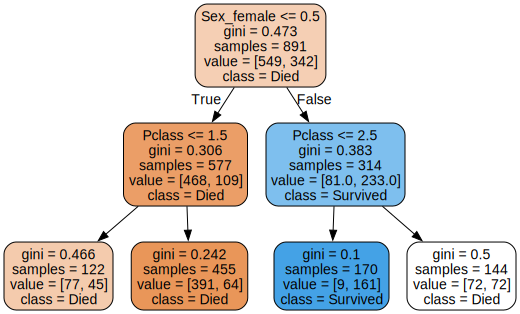

In [50]:
# Export and visualize the decision tree
dot_data = export_graphviz(classifier, 
                           feature_names=X_train.columns, 
                           class_names=['Died', 'Survived'], 
                           filled=True, 
                           rounded=True,
                           proportion=False)

# Create a graph from dot_data
graph = graphviz.Source(dot_data)
graph.render(filename='decision_tree', format='png')  # Save as a PNG file
graph  # Display the graph

### Second example using entropy
In this second example we will use the features Pclass, Sex, Age, Embarked.

We handle missing values in the 'Age' column by filling them with the median age. For the 'Embarked' column, we fill missing values with the most common embarkation port.
Encoding: Categorical features such as 'Sex' and 'Embarked' are encoded into numerical values using LabelEncoder.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Data preprocessing
def preprocess_data(df):
    """
    This function preprocesses the dataset:
    - Fills missing values
    - Encodes categorical features
    """
    # Fill missing values for 'Age' and 'Embarked'
    df['Age'].fillna(df['Age'].median(), inplace=True)  # Use median age for missing values
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Use most common embarkation port for missing values
    
    # Encode categorical features
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Convert 'Sex' to numerical values
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # Convert 'Embarked' to numerical values
    
    return df

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Select features and target
features = ["Pclass", "Sex", "Age", "Embarked"]
X_train = train_data[features]
y_train = train_data["Survived"]
X_test = test_data[features]

We use DecisionTreeClassifier with criterion='entropy' for information gain, max_depth=5 to prevent overfitting, and random_state=42 for consistent results. The model is trained on the training features and target. Predictions are made on the test set, and accuracy and classification report are displayed.

In [52]:
from sklearn import tree

# Initialize and train the model
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
"""
Initialize the Decision Tree Classifier with:
- criterion='entropy': Use information gain to split the nodes.
- max_depth=5: Limit the depth of the tree to prevent overfitting.
- random_state=42: Set seed for reproducibility.
"""
classifier.fit(X_train, y_train)  # Train the model with training data

# Predict on the test set
y_pred = classifier.predict(X_test)  # Make predictions on the test set

# Display accuracy and classification report
print(f"Accuracy: {accuracy_score(y_train, classifier.predict(X_train)):.2f}")
"""
Calculate and print the accuracy of the model on the training data.
"""
print(classification_report(y_train, classifier.predict(X_train)))
"""
Generate and print a classification report which includes precision, recall, and f1-score for each class.
"""


Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       549
           1       0.91      0.64      0.75       342

    accuracy                           0.84       891
   macro avg       0.86      0.80      0.82       891
weighted avg       0.85      0.84      0.83       891



'\nGenerate and print a classification report which includes precision, recall, and f1-score for each class.\n'

We visualize the decision tree to understand its structure and decision-making process, and export it for a more detailed view.


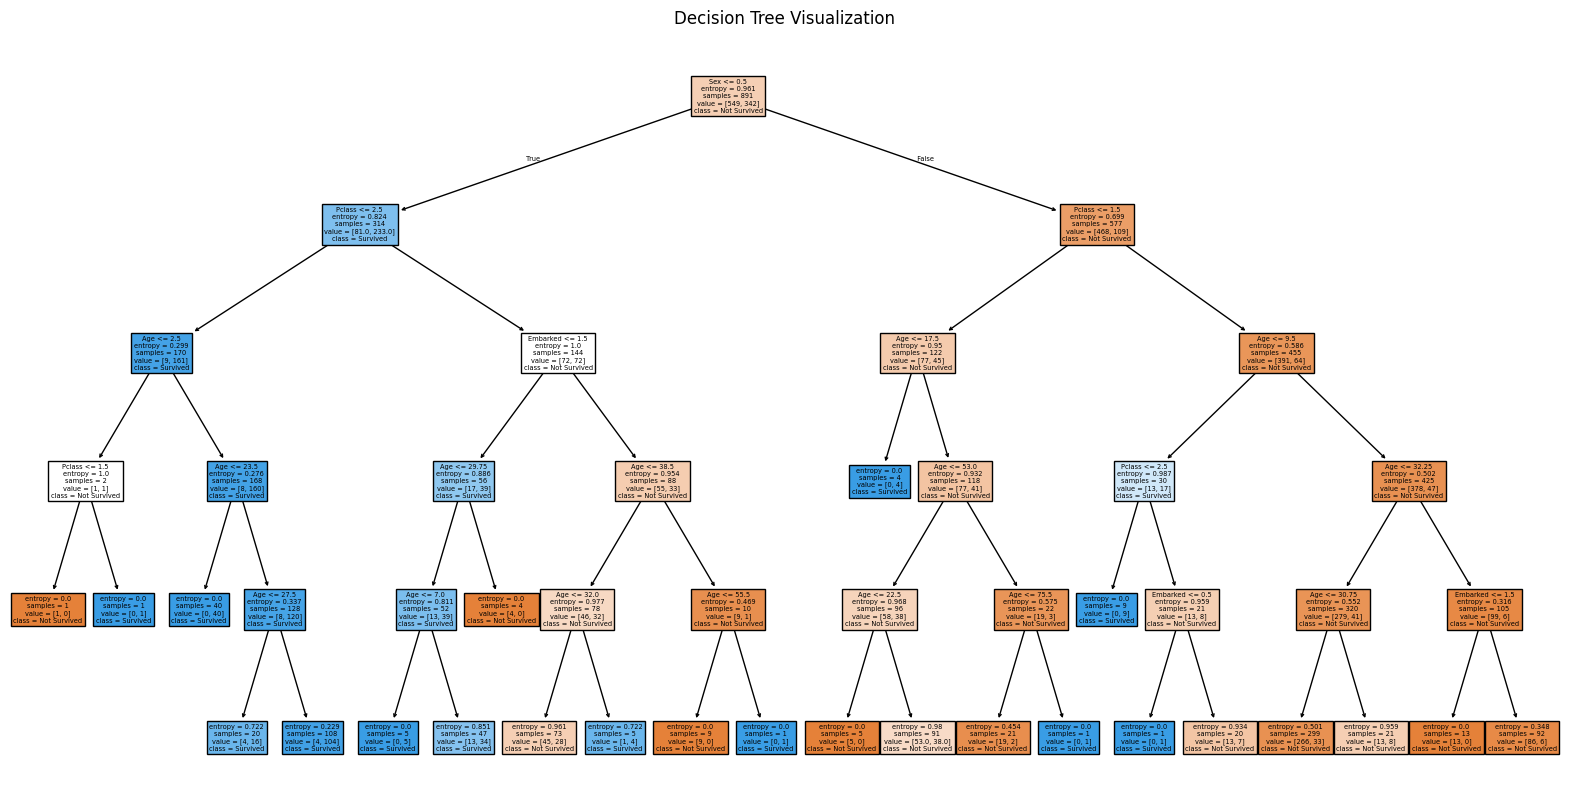

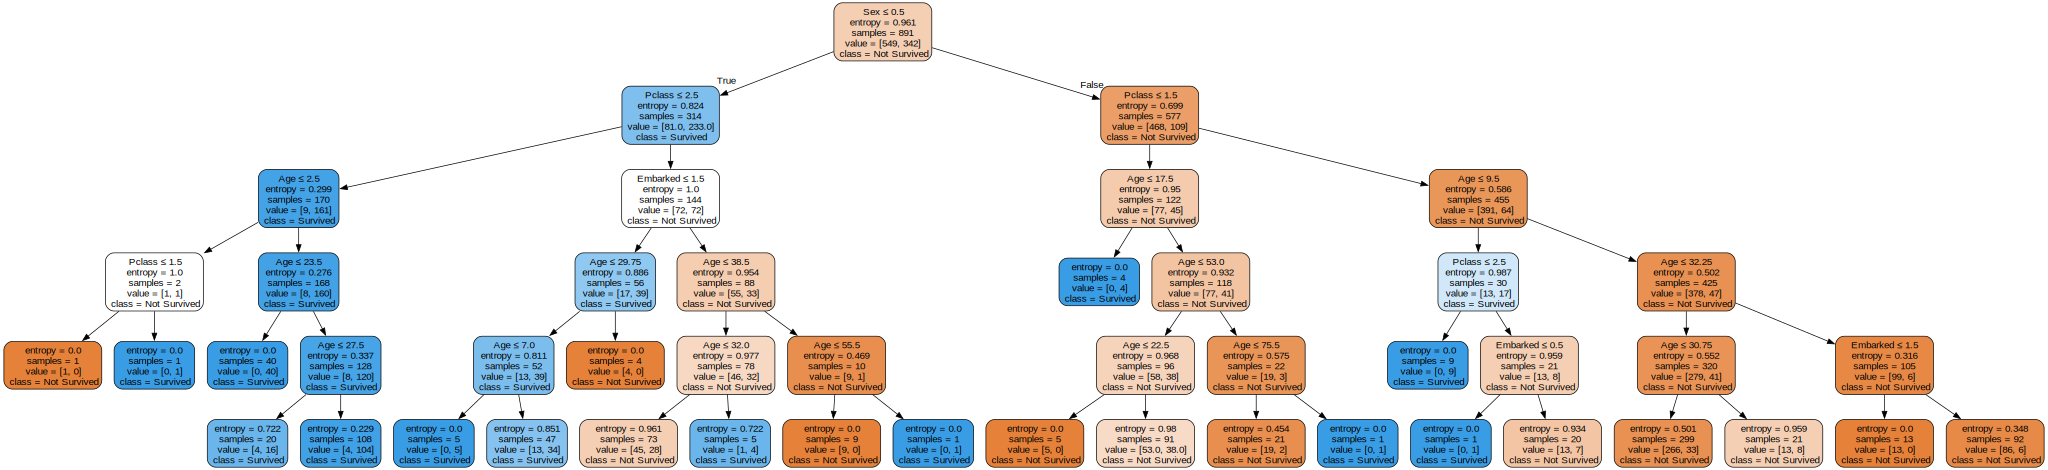

In [53]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Export and visualize the decision tree using Graphviz
dot_data = export_graphviz(classifier, 
                           feature_names=features, 
                           class_names=['Not Survived', 'Survived'], 
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render(filename='decision_tree', format='png')
graph  # Display the graph


### Third example using Gini Impurity

Gini impurity is a metric used to measure the quality of a split in a decision tree. It quantifies the degree of disorder or impurity in a dataset, with the goal of finding the best split that minimizes impurity. Here’s a brief explanation of how it works.

Gini Impurity Calculation: For a given dataset, Gini impurity is calculated as:
\[Gini(D) = 1- \sum\limits_{i=1}^{k} p_i^2,\]
where $p_i4 s the proportion of examples in class $i$, and $k$is the number of classes.

A Gini impurity of 0 indicates a perfectly pure split (all instances belong to a single class). A higher Gini impurity indicates a higher degree of impurity.

In decision trees, Gini impurity helps in selecting the attribute that results in the most homogeneous subgroups. The attribute that minimizes the weighted sum of Gini impurities in the child nodes is preferred for splitting.

Validation Accuracy: 78.21%
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       105
           1       0.79      0.65      0.71        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



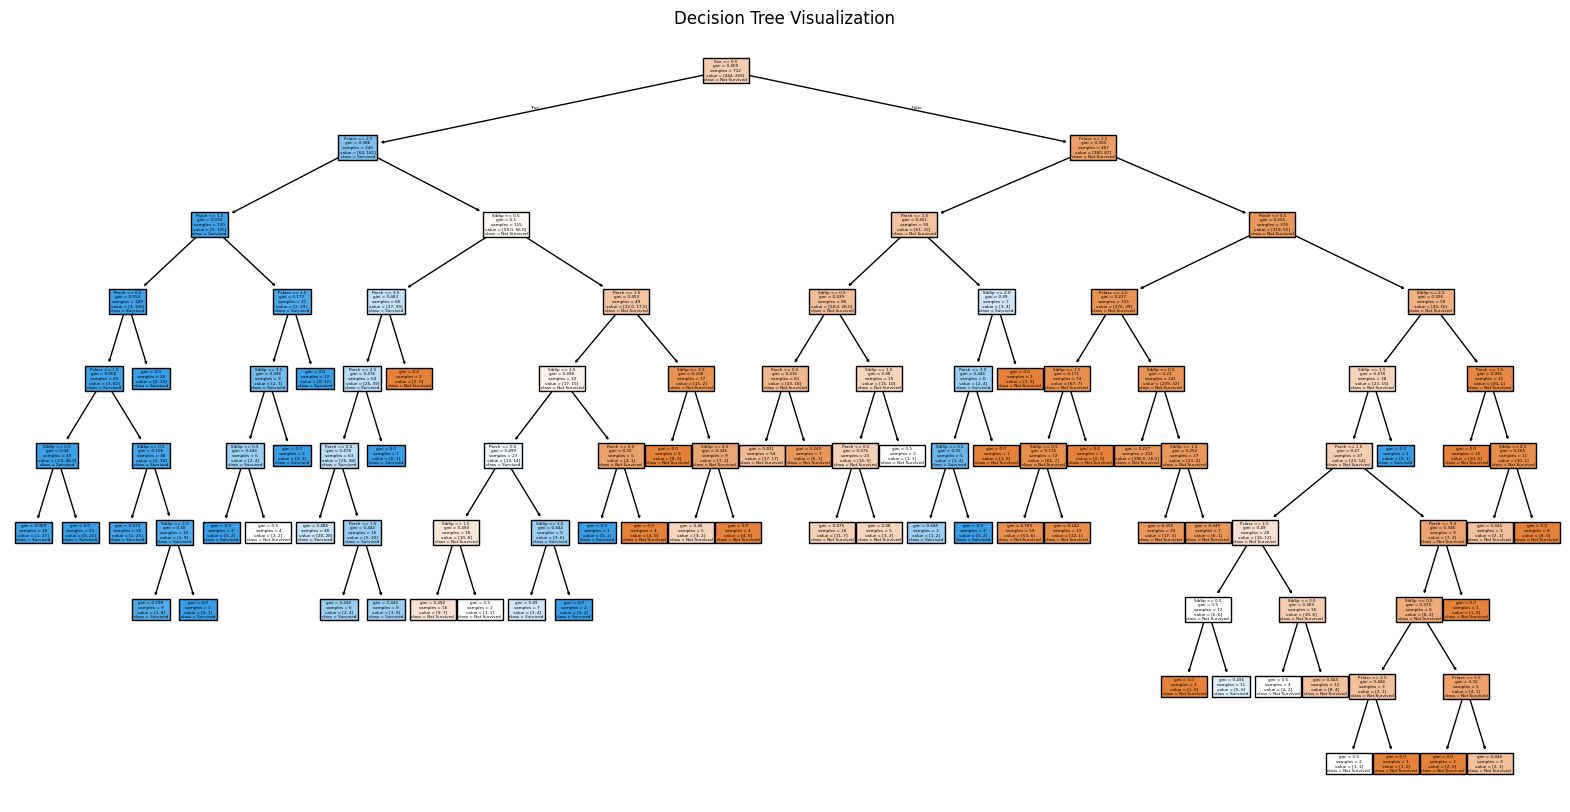

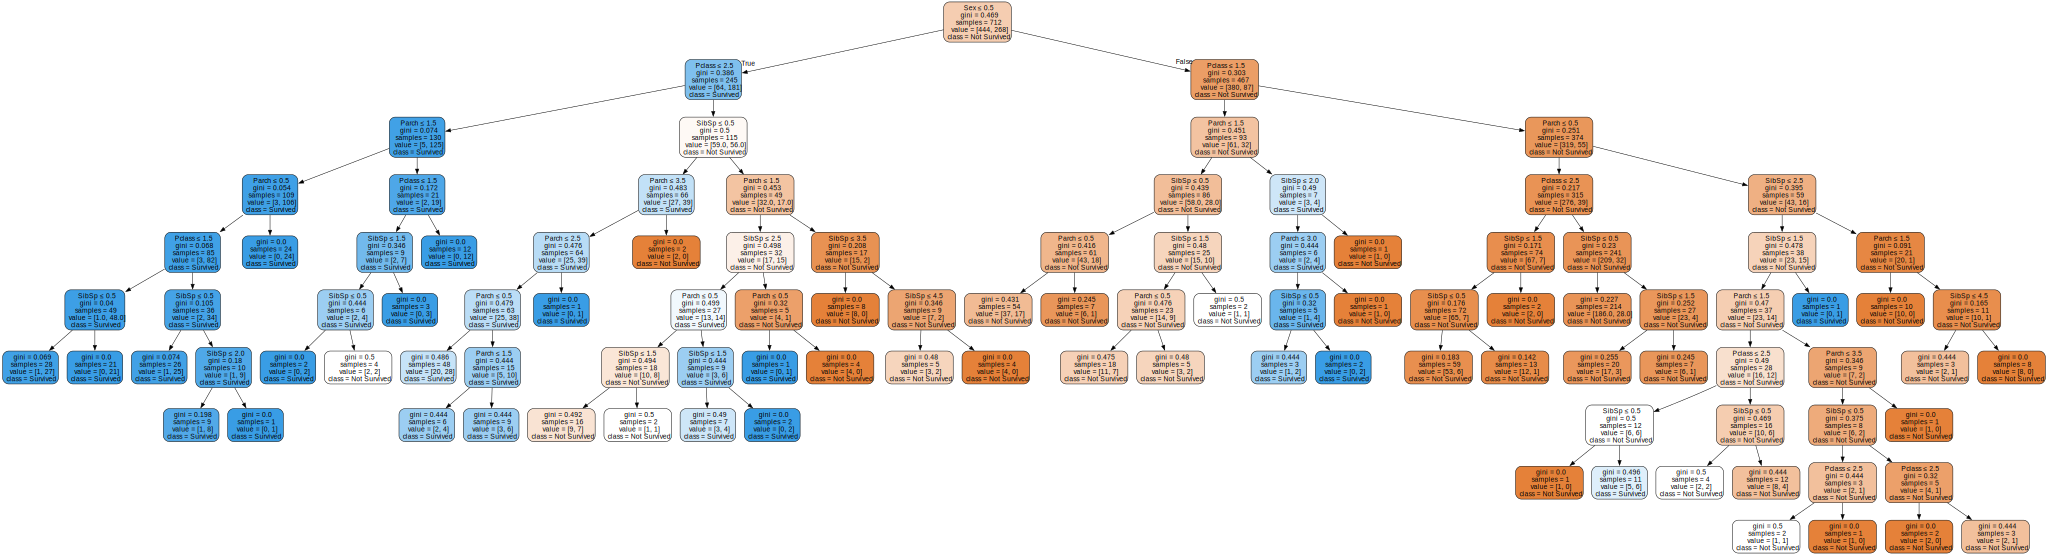

In [54]:
# Here’s how you can use Gini impurity in decision tree mode

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

# Select the features of interest
features = ["Pclass", "Sex", "SibSp", "Parch"]

# Convert categorical variables into dummy/indicator variables
X_train = pd.get_dummies(train_data[features])
y_train = train_data["Survived"]
X_test = pd.get_dummies(test_data[features])

# Optional: Split the training data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier using Gini impurity
id3_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model on the training split
id3_classifier.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
val_predictions = id3_classifier.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, val_predictions)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(classification_report(y_val_split, val_predictions))

# Make predictions on the final test data
test_predictions = id3_classifier.predict(X_test)

# Generate the submission file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_predictions})
output.to_csv('gini_submission.csv', index=False)

# Plot the decision tree using matplotlib
plt.figure(figsize=(20,10))
plot_tree(id3_classifier, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Export and visualize the decision tree using Graphviz
dot_data = export_graphviz(id3_classifier, 
                           feature_names=X_train.columns, 
                           class_names=['Not Survived', 'Survived'], 
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render(filename='decision_tree', format='png')
graph  # Display the graph


# Greedy Forest